In [1]:

import seaborn as sns
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
from matplotlib.colors import LinearSegmentedColormap


In [2]:
heatmaps = []
with open(Path.cwd() / "max_rs_heatmap.csv") as csvfile: 
    reader_csv = csv.reader(csvfile)
    i = 0
    for row in reader_csv:
        if i == 0:
            i += 1
            continue
        else:
            heatmaps.append(row)

In [3]:
heatmap_vals = np.array(heatmaps, dtype=float)

In [4]:
Lths = []
with open(Path.cwd() / "Lth_s.csv") as csvfile: 
    reader_csv = csv.reader(csvfile)
    i = 0
    for row in reader_csv:
        if i == 0:
            i += 1
            continue
        else:
            Lths.append(row[0])

In [5]:
Lth_vals = np.array(Lths, dtype=float)

In [6]:
inhibs = []
with open(Path.cwd() / "inhib_shutoff_s.csv") as csvfile: 
    reader_csv = csv.reader(csvfile)
    i = 0
    for row in reader_csv:
        if i == 0:
            i += 1
            continue
        else:
            inhibs.append(row[0])

In [7]:
inhib_vals = np.array(inhibs, dtype=float)

In [8]:
beta_vals = []
with open(Path.cwd() / "beta_heatmap.csv") as csvfile: 
    reader_csv = csv.reader(csvfile)
    i = 0
    for row in reader_csv:
        if i == 0:
            i += 1
            continue
        else:
            beta_vals.append(row)

In [9]:
beta_vals_ar = np.array(beta_vals, dtype=float)

In [10]:
beta_vals_ar

array([[ 0.5  ,  3.718,  5.4  , ..., 70.756, 71.478, 72.2  ],
       [ 0.18 ,  3.718,  5.4  , ..., 70.756, 71.478, 72.2  ],
       [ 0.98 ,  3.718,  4.056, ..., 70.756, 71.478, 72.2  ],
       ...,
       [ 0.18 ,  0.55 ,  0.216, ...,  1.764,  1.782,  1.8  ],
       [ 0.5  ,  0.198,  1.176, ...,  1.764,  1.782,  1.8  ],
       [ 0.18 ,  0.198,  0.216, ...,  1.764,  1.782,  1.8  ]])

In [11]:
num_ticks = 10
# the index of the position of yticks
yticks = np.linspace(0, len(inhib_vals) - 1, num_ticks, dtype=int)
# the content of labels of these yticks
yticklabels = [inhib_vals[idx] for idx in yticks]

In [12]:
# the index of the position of yticks
xticks = np.linspace(1, len(Lth_vals) - 1, num_ticks, dtype=int)
# the content of labels of these yticks
xticklabels = [round(Lth_vals[idx]*1000000, 4) for idx in xticks]

In [13]:
colors = ['red', 'white', '#947CB3']
cm = LinearSegmentedColormap.from_list(
        'yes', colors)

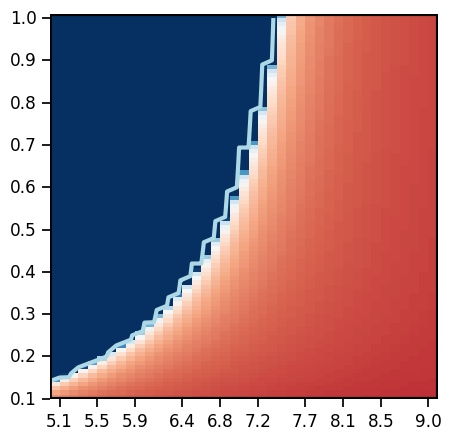

In [15]:

sns.set_context("notebook", font_scale=1.1, rc={"lines.linewidth": 2, 'font.family': ['arial'], 'axes.linewidth':2})
plt.subplots(figsize=(5,5))
ax = sns.heatmap(np.transpose(heatmap_vals), xticklabels=xticklabels, cbar=False, 
                 cmap='RdBu', vmin=0, vmax=500)

plt.contour(np.transpose(beta_vals_ar),levels=[6.8],linewidths=3, colors='lightblue')
plt.gca().invert_yaxis()
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)
ax.set_xticklabels(xticklabels)
plt.xticks(rotation=0)

# Drawing the frame
ax.axhline(y = 0, color='k',linewidth = 3)
ax.axhline(y = heatmap_vals.shape[1], color = 'k',linewidth = 3)
ax.axvline(x = 0, color = 'k',linewidth = 2)
ax.axvline(x = heatmap_vals.shape[0],color = 'k', linewidth = 3)
plt.savefig("hill_335_paramater-screen_heatmap_beta.png", dpi = 500, bbox_inches='tight')

###### 